In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [109]:
X = np.linspace(0, 100, num=100)
y = 4.5*X + 10 

noise = np.random.normal(0, 5, size=100)
y_actual = y + noise

In [110]:
X_reshaped = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped,y_actual, test_size=0.2, random_state=42)

In [111]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
print(f'Learned Coefficint= {model.coef_}')

Learned Coefficint= [4.48360503]


In [113]:
print(f'Learned Intercept= {model.intercept_}')

Learned Intercept= 10.71279472373945


In [114]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [115]:
print(f'MAE Training= {mean_absolute_error(y_train, y_train_pred)}')
print(f'MAE Test= {mean_absolute_error(y_test, y_test_pred)}')

MAE Training= 3.895239629273503
MAE Test= 4.611485024981444


> The MAE for both training and testing is somehow close and the the small gap means the model generalizes well and is not memorizing the data.

In [116]:
print(f'MSE Training= {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE Test= {mean_squared_error(y_test, y_test_pred)}')

MSE Training= 24.368156556249254
MSE Test= 34.460724414953184


> Both training and test MSE are low (relative to the data scale), which shows good accuracy

> The test MSE is slightly bigger but still within the acceptable range (unseen data normally tend to be harder)

In [117]:
print(f'R Score Training= {r2_score(y_train, y_train_pred)}')
print(f'R Score Test= {r2_score(y_test, y_test_pred)}')

R Score Training= 0.9985764927014744
R Score Test= 0.9979364708093698


> the R Score value further emphasize that the model performs very will and explains over 99.7% of the variance in both sets, which hints at a high prediction accuracy "low error rate" so no underfitting + The small drop from training to test means no significant overfitting.

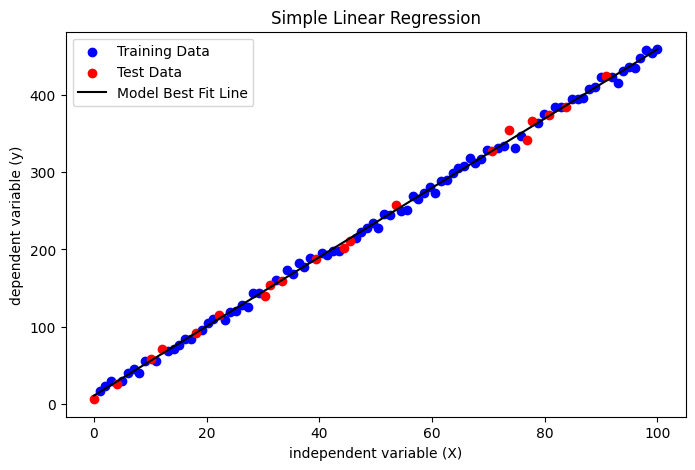

In [118]:
y_pred = model.predict(X_reshaped)

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_reshaped, y_pred, color='black' , label='Model Best Fit Line')
plt.title('Simple Linear Regression')
plt.xlabel('independent variable (X)')
plt.ylabel('dependent variable (y)')
plt.legend()
plt.show()

> Since the Relationship between x and y is strictly 'linear' (being represented as a linear equation $y = mx + c$ ) , The linear regression line captures the data almost perfectly 

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [119]:
np.random.seed(0)

X1 = np.random.randint(0,100, size=100).reshape(-1,1)
X2 = np.random.randint(0,100, size=100).reshape(-1,1)

y = 2.5*X1 + 6*X2 + 20 + np.random.normal(5, 50, size=100)

In [120]:
X = np.column_stack([X1,X2])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [121]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
print(f'''Actual Coefficients= [2.5 , 6], 
Multiple Linear Regression Model coefficients= {model.coef_[0][0]} , {model.coef_[0][1]}''')

Actual Coefficients= [2.5 , 6], 
Multiple Linear Regression Model coefficients= 2.499999999999999 , 5.999999999999999


In [123]:
print(f'''Actual Intercept= 20, 
Multiple Linear Regression Model Intercept= {model.intercept_[0]}''')

Actual Intercept= 20, 
Multiple Linear Regression Model Intercept= -24.612877496711747


> The learned Coefficients are almost the same as the original (Original Weights perfectly captured by Model)

> The learned Intercept varies a lot from the orignial (as the model tries to capture the variance in the data)

In [124]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [125]:
print(f'MAE Training= {mean_absolute_error(y_train, y_train_pred)}')
print(f'MAE Test= {mean_absolute_error(y_test, y_test_pred)}')

MAE Training= 4.3749943350641323e-13
MAE Test= 4.3935462675411443e-13


> Average prediction error is extremely close to zero, meaning no large deviations exist

> The gap between MAE values for both sets is very prief (~0.02), which means the model generalizes well and is not memorizing the data.

In [126]:
print(f'MSE Training= {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE Test= {mean_squared_error(y_test, y_test_pred)}')

MSE Training= 2.397025281726515e-25
MSE Test= 2.419976019244596e-25


> Both training and test MSE are low is extremely close to zero, which shows good accuracy

> The gap between test MSE and train MSE is small, which means the model likely is not suffering from overfitting

In [127]:
print(f'R Score Training= {r2_score(y_train, y_train_pred)}')
print(f'R Score Test= {r2_score(y_test, y_test_pred)}')

R Score Training= 1.0
R Score Test= 1.0


> the R Score value for both training and testing sets = 1.0 which indicates that the model performs perfectly and captures 100% of the variance in data, so model is not suffering underfitting nor overfitting.

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [128]:
np.random.seed(0)

X1 = np.random.randint(0,1000, size=100).reshape(-1,1)
X2 = np.random.randint(0,1000, size=100).reshape(-1,1)

y = 5.1*X1**2 + 7.2*X2 + 12.8 + np.random.normal(10, 100, size=100)

In [129]:
X = np.column_stack([X1,X2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [131]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [132]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [133]:
print(f'MAE Training= {mean_absolute_error(y_train, y_train_pred)}')
print(f'MAE Test= {mean_absolute_error(y_test, y_test_pred)}')

MAE Training= 1.390482492240608e-07
MAE Test= 1.6424769637524146e-07


> Average prediction error is extremely close to zero, meaning no large deviations exist

> The gap between MAE values for both sets is small (~0.25), which means the model generalizes well and is not memorizing the data.

In [134]:
print(f'MSE Training= {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE Test= {mean_squared_error(y_test, y_test_pred)}')

MSE Training= 3.4782084305547704e-14
MSE Test= 4.1433909321132227e-14


> Both training and test MSE are extremely close to zero, which shows good accuracy

> The gap between test MSE and train MSE is rather normal as unseen data tends to be harder to predict, and the model is likely not suffering from overfitting

In [135]:
print(f'R Score Training= {r2_score(y_train, y_train_pred)}')
print(f'R Score Test= {r2_score(y_test, y_test_pred)}')

R Score Training= 1.0
R Score Test= 1.0


> R^2 = 1 means the model explains 100% of the variance in the data

> There’s no drop between train and test, hence, absolutely no overfitting.

---------------------------------------------------------------------------

# Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [137]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\paragon\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [138]:
os.listdir(path)

['airlines_flights_data.csv']

In [139]:
full_path = os.path.join(path,os.listdir(path)[0])

In [140]:
import pandas as pd
df = pd.read_csv(full_path)

In [141]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [142]:
df.drop(columns=['index'],inplace=True)

## 1.EDA

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


> So far No problems with data Formatting

In [144]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [145]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

> Data doesn't include missing values

In [146]:
df.duplicated().sum()

np.int64(0)

> Data doesn't suffer duplicated entries

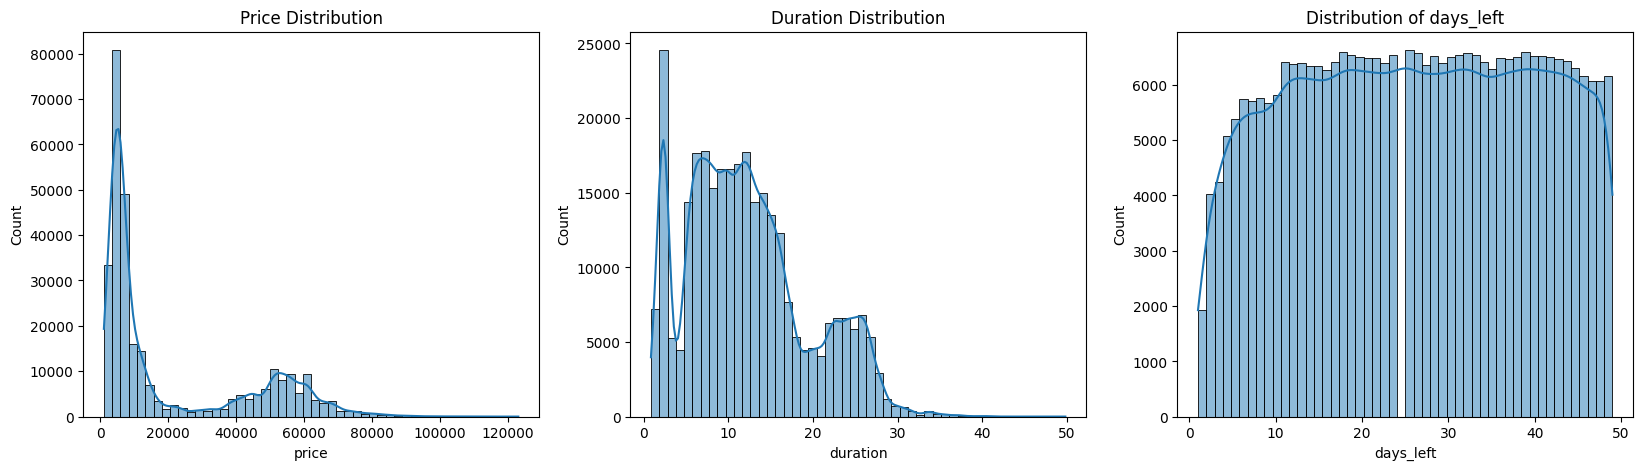

In [147]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df['duration'], bins=50, kde=True)
plt.title('Duration Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['days_left'], bins=50, kde=True)
plt.title('Distribution of days_left')

plt.show()

> Price distribution is strongly right skewed, with a huge peak between 0 -> 20000

> Duration distribution is also right skewed (but Trimodial)

> days_left is uniformly distributed, which indicates that prices are quite evenly distributed across the 0–50 range

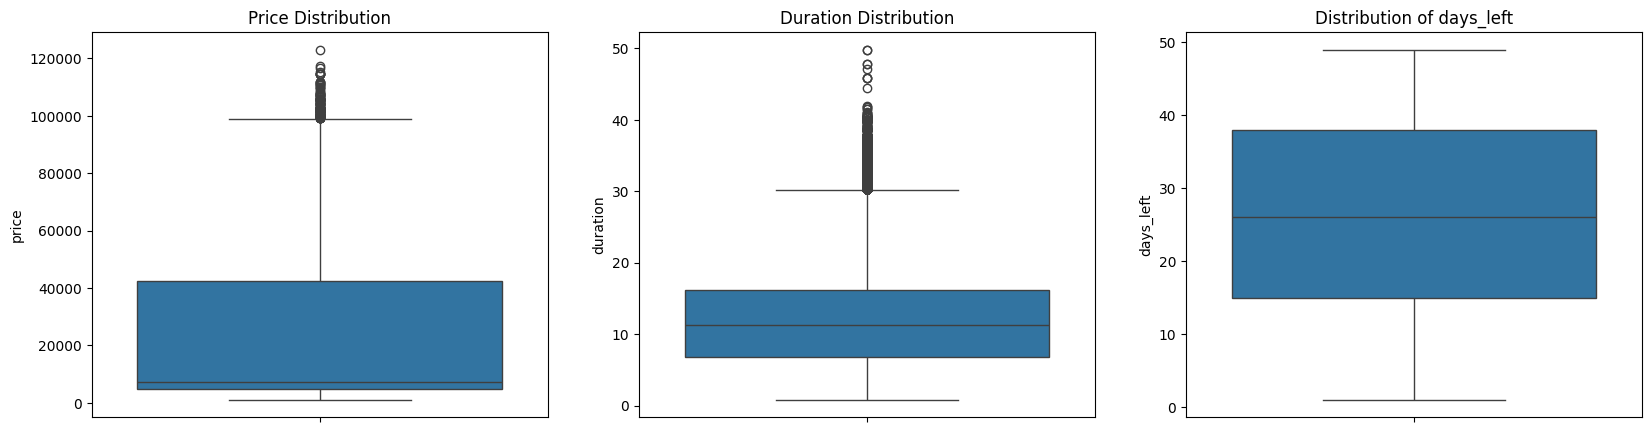

In [148]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['price'])
plt.title("Price Distribution")

plt.subplot(1, 3, 2)
sns.boxplot(df['duration'])
plt.title('Duration Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(df['days_left'])
plt.title('Distribution of days_left')

plt.show()

> Price Distribution: Many values exceed the upper bound (above 100,000), indicating a significant number of high-price outliers

> Duration Distribution: Outliers are present above ~30 hours, going up to around 45–50 hours

> Days Distribution: Realtively uniform with no clear outliers

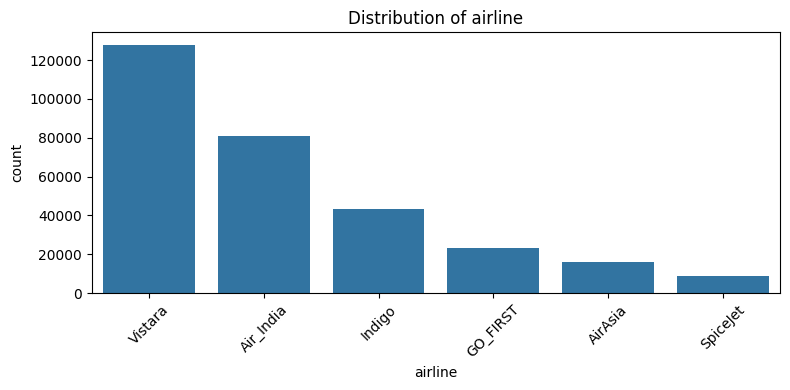

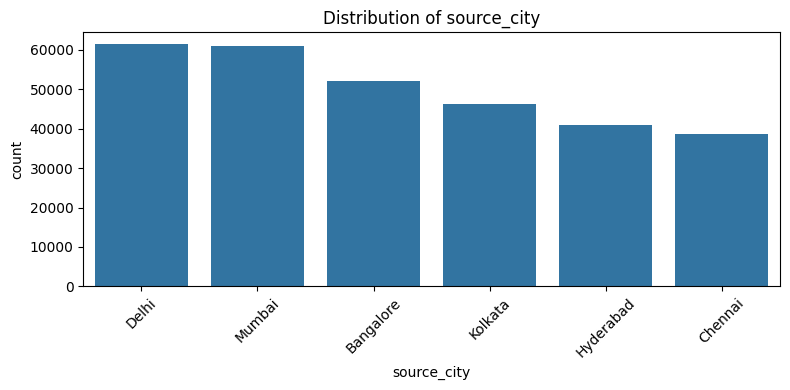

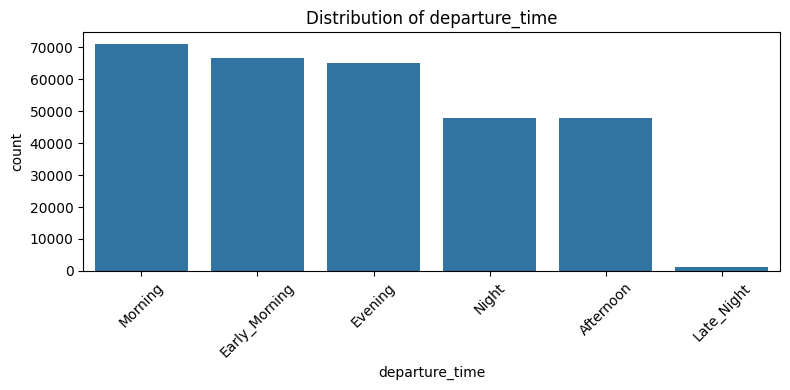

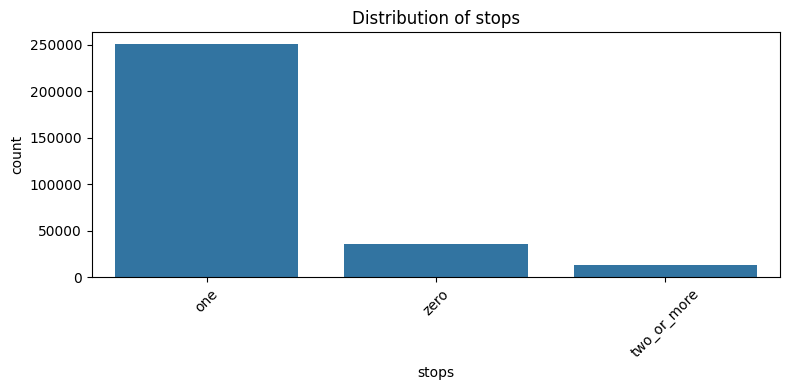

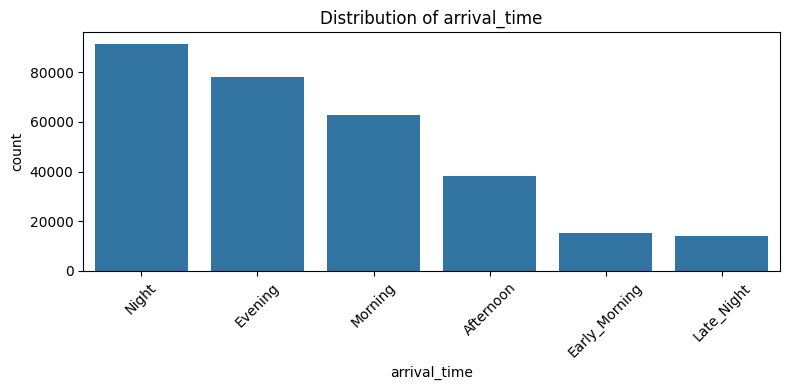

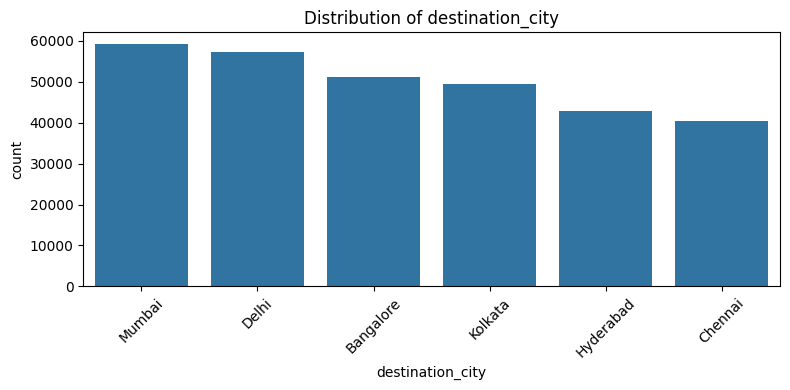

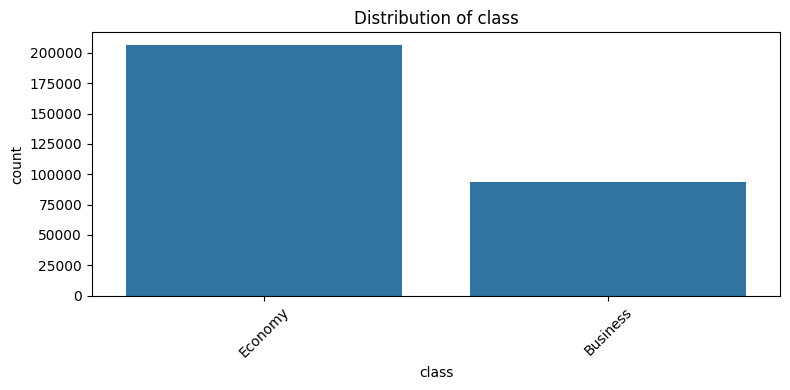

In [149]:
for col in df.select_dtypes(include='object').columns:
    if (col == 'flight'):
        continue
    else:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, order=df[col].value_counts().index, data= df)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

> Bar charts for Categorical features so far shows no inconsistency problems

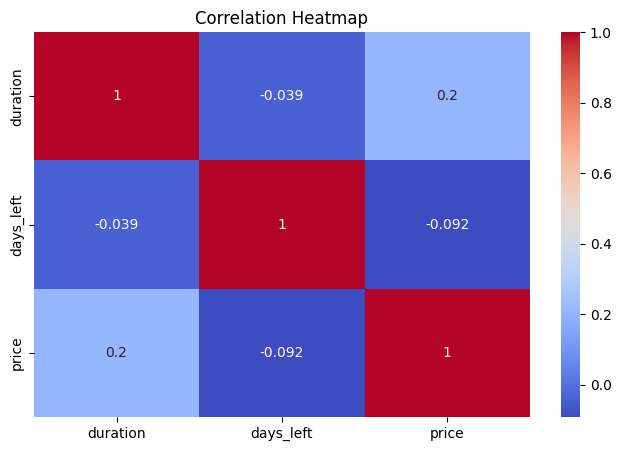

In [150]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

> No strong predictive power for `duration` and `days_left` over the `target ptice`

## 2. Data Cleaning

In [151]:
lower_limit = 0.001 
upper_limit = 0.001 

df['price'] = winsorize(df['price'], limits=(lower_limit, upper_limit))
df['duration'] = winsorize(df['duration'], limits=(lower_limit, upper_limit))

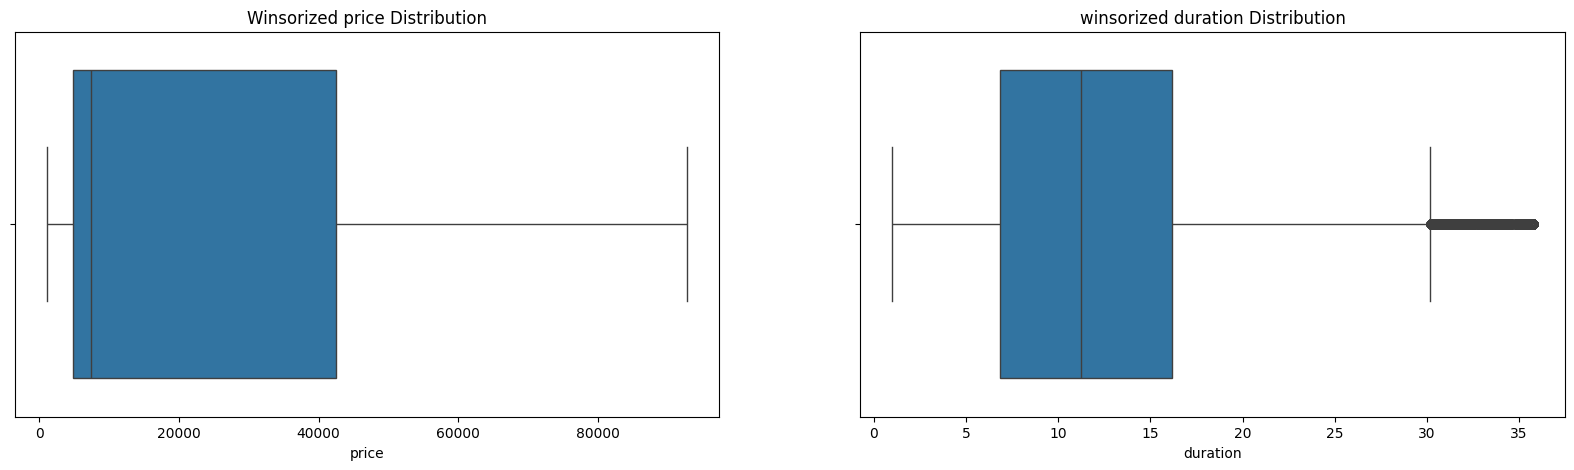

In [152]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='price', data=df)
plt.title('Winsorized price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='duration', data=df)
plt.title('winsorized duration Distribution')

plt.show()

> As shown, by Winsorizing to (0.001,0.001), the extreme suspicious outliers where successfully handeled, while keeping those outliers that are not much extreme or might be plausible to avoid distorting the sparsity of original data.

## 3. Data Preprocessing:

Encoding:

In [153]:
nominal_cols = ['airline', 'destination_city', 'source_city'] 

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [154]:
df['flight'].nunique()

1561

> since flight has 1561 unique values it will be hard to dummy encode it will be frequency encoded instead

In [155]:
flight_freq = df['flight'].value_counts()
df['flight_freq'] = df['flight'].map(flight_freq)

In [156]:
ordered_departure_arrival = [['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']]

encoder = OrdinalEncoder(categories=ordered_departure_arrival)

df[['departure_time']] = encoder.fit_transform(df[['departure_time']])
df[['arrival_time']] = encoder.fit_transform(df[['arrival_time']])

In [157]:
ordered_stops = [['zero', 'one', 'two_or_more']]

encoder = OrdinalEncoder(categories=ordered_stops)

df[['stops']] = encoder.fit_transform(df[['stops']])

In [158]:
ordered_class = [['Economy', 'Business']]

encoder = OrdinalEncoder(categories=ordered_class)

df[['class']] = encoder.fit_transform(df[['class']])

In [159]:
df.drop(columns=['flight'], inplace=True)
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,flight_freq
0,3.0,0.0,4.0,0.0,2.17,1,5953,False,False,False,...,False,False,False,True,False,True,False,False,False,133
1,0.0,0.0,1.0,0.0,2.33,1,5953,False,False,False,...,False,False,False,True,False,True,False,False,False,131
2,0.0,0.0,0.0,0.0,2.17,1,5956,False,False,False,...,False,False,False,True,False,True,False,False,False,98
3,1.0,0.0,2.0,0.0,2.25,1,5955,False,False,False,...,False,False,False,True,False,True,False,False,False,1024
4,1.0,0.0,1.0,0.0,2.33,1,5955,False,False,False,...,False,False,False,True,False,True,False,False,False,987


Log Transformation:

In [160]:
df['price'] = np.log(df['price'])
df['duration'] = np.log(df['duration'])

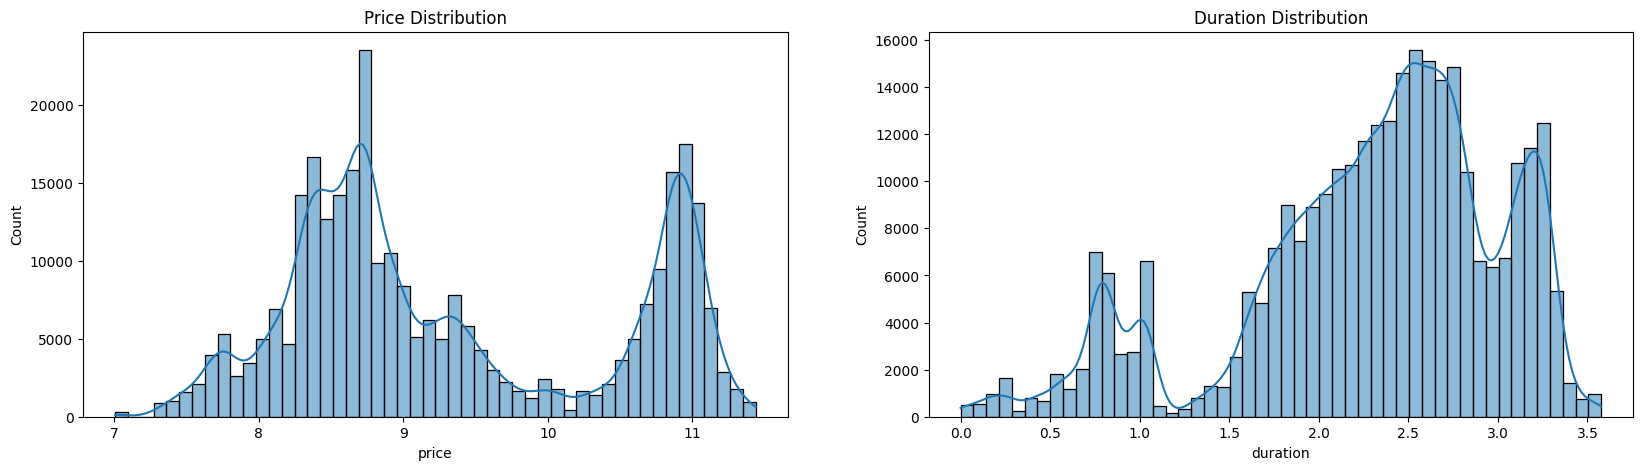

In [161]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['duration'], bins=50, kde=True)
plt.title('Duration Distribution')
plt.show()

> Data sucessfuly transformed to normal distribution

## 4. Splitting Data

In [168]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## 5. Scalling Numeric Data:

Using StandardScaler for Gaussian-like (no outliers numeric data)

In [178]:
scaler = StandardScaler()

X_train['days_left'] = scaler.fit_transform(X_train[['days_left']])
X_val['days_left'] = scaler.transform(X_val[['days_left']])
X_test['days_left'] = scaler.transform(X_test[['days_left']])

Using RobustScaler for numeric data with potential Outliers

In [180]:
Rscaler = RobustScaler()

X_train['duration'] = Rscaler.fit_transform(X_train[['duration']])
X_val['duration'] = Rscaler.transform(X_val[['duration']])
X_test['duration'] = Rscaler.transform(X_test[['duration']])

## 6. Modelling:

In [181]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [194]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

## 7. Evaluating The Model

In [196]:
print(f'MAE Training= {mean_absolute_error(y_train, y_train_pred)}')
print(f'MAE Validation= {mean_absolute_error(y_val, y_val_pred)}')

MAE Training= 0.22886883494760063
MAE Validation= 0.2291940369888795


In [197]:
print(f'MSE Training= {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE Validation= {mean_squared_error(y_val, y_val_pred)}')

MSE Training= 0.08452319603009902
MSE Validation= 0.08525781900231427


In [198]:
print(f'RMSE Training= {root_mean_squared_error(y_train, y_train_pred)}')
print(f'RMSE Validation= {root_mean_squared_error(y_val, y_val_pred)}')

RMSE Training= 0.29072873272192934
RMSE Validation= 0.291989415908033


In [199]:
print(f'R Score Training= {r2_score(y_train, y_train_pred)}')
print(f'R Score Validation= {r2_score(y_val, y_val_pred)}')

R Score Training= 0.9155316790951978
R Score Validation= 0.9144840468858331


> The error MAE, RMSE, MSE values for training set are all realtivly small, which indicates good performance and no underfitting problems

> Model captures ~92% of sparsity in training set data which shows healthy performance

> The error MAE, RMSE, MSE values for validation set are all prrtty close to their respective values in training set, which shows good overall generalization (no overfitting)

> Model captures ~91% of sparsity in validation set data almost as it does for training set, ensuring again that the model is overall healthy with no severe modelling problems

In [ ]:
y_test_pred = model.predict(X_test)

In [200]:
print(f'MAE Test= {mean_absolute_error(y_test, y_test_pred)}')
print(f'RMSE Test= {root_mean_squared_error(y_test, y_test_pred)}')
print(f'MSE Test= {mean_squared_error(y_test, y_test_pred)}')
print(f'R Score Test= {r2_score(y_test, y_test_pred)}')

MAE Test= 0.22754557299910644
RMSE Test= 0.2890067099056182
MSE Test= 0.08352487837047018
R Score Test= 0.916502869330471


> The evaluation metrics' results for test set align well with those of training and validation sets, further emphasizing on good generalization and absence of (underfitting/overfitting)

## 8. Saving The model

In [201]:
import joblib

joblib.dump(model, 'linearRegressionModel.pkl')

['linearRegressionModel.pkl']

------------------------

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
